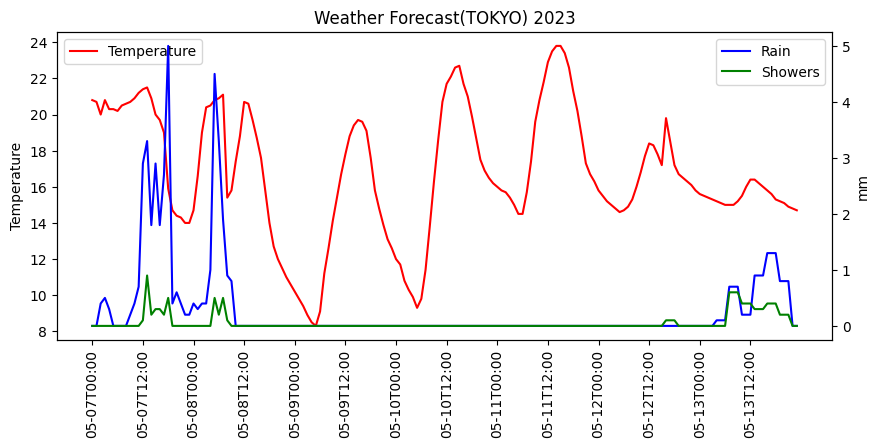

In [1]:
import requests
import json
import matplotlib.pyplot as plt

url = 'https://api.open-meteo.com/v1/forecast?latitude=35.69&longitude=139.69&hourly=temperature_2m,rain,showers&timezone=Asia%2FTokyo'

response = requests.get(url)
data = json.loads(response.text)

#plt.rcParams['figure.figsize'] = [6, 3]
#plt.rcParams['figure.facecolor'] = "black"

def draw_chart(data):
  labels = data['hourly']['time']

  new_labels = [ '-'.join(element.split("-")[1:]) for element in labels]
  #new_labels = [ element.split("T")[0]  for element in labels]
  rain = data['hourly']['rain']
  showers = data['hourly']['showers']
  temperature = data['hourly']['temperature_2m']

  fig, ax1 = plt.subplots(figsize=(10, 4))
  plt.xticks(range(0, len(new_labels), 12), rotation=90)

  ax1.plot(new_labels, temperature, label='Temperature', color='red')
  ax2 = ax1.twinx()

  ax2.plot(new_labels, rain, label='Rain', color='blue')
  ax2.plot(new_labels, showers, label='Showers', color='green')
  plt.xlabel('Date')
  ax1.set_ylabel('Temperature')
  ax2.set_ylabel('mm')
  plt.title('Weather Forecast(TOKYO) ' + labels[0].split('-')[0] )
  ax1.legend(loc='upper left')
  ax2.legend(loc='upper right')
  plt.show()


  fig.tight_layout()

draw_chart(data)